# Basic use of library

After a successful installation (see Intoduction.ipynb), the library can be imported.

In [1]:
import sys
!{sys.executable} -m pip install ../. --quiet --user #installation of library in local enviorment
from pyRN import pyRN

Reaction networks can be loaded form a text files, please refer to `../netwoks/rn_test.txt` to see an example. Textfiles preserve [antimony](https://http://antimony.sourceforge.net/) general strucutre in terms of reaction and reaction arrows (=> for unidirectional reactions and -> for reversible reaction). So an pyRN object can be created by the following command:

In [2]:
file="../networks/rn_test.txt"
RN = pyRN.setFromText(file)

Alternative sbml files can be loaded:

In [3]:
file="../networks/PW000035.sbml"
RN = pyRN.setFromSbml(file,modifiers=True,bond_con=True,rand_bc=False)

The latter inizialization options corresponds to:

- `modifiers`: if consider modifiers species as catalizers
- `bond_con`: if considers boundary condition species as inflow, by adding a reaction
- `rand_bc`: Consider a random selection of the bonday condition species as inflow.

Once the reaction network is inizialized, basic properties can be easily obtained:

In [4]:
print("Vector of species Id's")
print(RN.SpIdStrArray)
print("Vector of species names, in case of an initialization form an smbl file result can be different")
print(RN.SpNameStrArray)
print("Display species")
RN.printSp()
print("Display reactions")
RN.printRp()

Vector of species Id's
['Compound1034' 'Compound1065' 'Compound1104' 'Compound1170'
 'Compound1420' 'Compound1632' 'Compound165' 'Compound170' 'Compound1860'
 'Compound1957' 'Compound1973' 'Compound2109' 'Compound32' 'Compound414'
 'Compound964' 'ProteinComplex320' 'ProteinComplex327' 'ProteinComplex328'
 'ProteinComplex329' 'ProteinComplex330']
Vector of species names, in case of an initialization form an smbl file result can be different
['Tyrosinase' 'FAD' 'Pyrophosphate' 'Dimethylbenzimidazole' 'Water'
 'Adenosine diphosphate' 'Oxygen' 'Hydroquinone' 'Flavin Mononucleotide'
 '6,7-Dimethyl-8-(1-D-ribityl)lumazine'
 'Ectonucleotide pyrophosphatase/phosphodiesterase family member 1'
 'Riboflavin kinase' 'Quinone' 'Riboflavin' 'FAD synthase'
 'Low molecular weight phosphotyrosine protein phosphatase'
 'Adenosine monophosphate' '7-Hydroxy-6-methyl-8-ribityl lumazine'
 'Adenosine triphosphate' 'Phosphate']
Display species
Species:  {Compound1034, Compound1065, Compound1104, Compound1170,

In [5]:
print("Reactive stochiometric matrix")
RN.MrDf

Reactive stochiometric matrix


,0,1,2,3,4,5,6,7,8,9
Compound1034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Compound1065,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Compound1104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Compound1170,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
Compound1420,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Compound1632,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Compound165,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
Compound170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Compound1860,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Compound1957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
print("Productive stoichimetric matrix")
RN.MpDf

Productive stoichimetric matrix


,0,1,2,3,4,5,6,7,8,9
Compound1034,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Compound1065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Compound1104,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Compound1170,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Compound1420,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Compound1632,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Compound165,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
Compound170,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Compound1860,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Compound1957,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [7]:
print("Stoichiometric Matrix")
RN.MrDf-RN.MpDf

Stoichiometric Matrix


,0,1,2,3,4,5,6,7,8,9
Compound1034,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0
Compound1065,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Compound1104,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
Compound1170,0.0,0.0,-1.0,1.0,1.0,-1.0,0.0,0.0,0.0,0.0
Compound1420,-2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Compound1632,2.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Compound165,0.0,0.0,0.0,0.0,-1.0,1.0,1.0,0.0,-1.0,0.0
Compound170,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
Compound1860,-2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Compound1957,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0


In [8]:
print("Inflow species")
print(RN.getInflowFromSp(RN.SpIdStrArray,set_type=True))
print("Outflow species")
print(RN.getOutflowFromSp(RN.SpIdStrArray,set_type=True))

Inflow species
['Compound1170']
Outflow species
['Compound1957' 'Compound414']


The functions `printSp()` and `printRp()` can receive as argument `np.arrays` of the elements to be displayed. The `getInflowFromSp` and `getOutflowFromSp` functions, the `set_type=True` the the return typpe corresponds `string np.array object`, if not, retruns a `bitarray`. 

There are also functions to visualize the network as well as the stoichiometric matrix:

<Figure size 720x360 with 0 Axes>

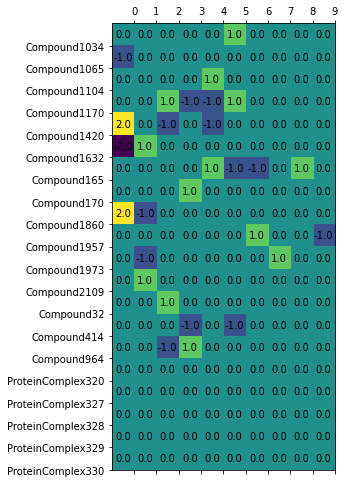

In [9]:
RN.plotS()
nt=RN.getRnDisplayPv()
nt.show("RN.html")